## Recap of random number generation and more about interactions

### `set obs` and `random`

In the future, we will look more into simulations using Stata. For now, let's recap how you can declare new observations and use the random number generator possibilities in Stata. The commans we use are: 

1. `set obs` 
2. `set seed`
2. `generate`
3. `runiform()`

Let's see them in action:

In [1]:
clear
set obs 1000
set seed 1234
gen y = runiform()



number of observations (_N) was 0, now 1,000






(bin=29, start=.00022811, width=.03442595)


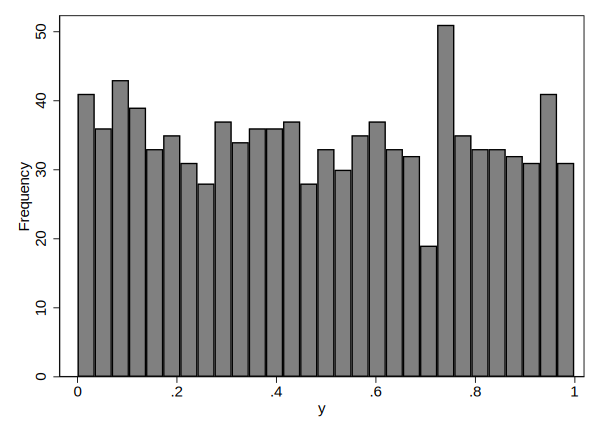

In [2]:
set scheme s1mono
hist y, freq

As you can see, the historgram gives the distribution of $y$. However, since $N=1000$, the distribution is not so uniform after all. Let's declare more observations:


number of observations (_N) was 1,000, now 10,000,000

(9,999,000 real changes made)

(bin=70, start=1.647e-08, width=.01428571)


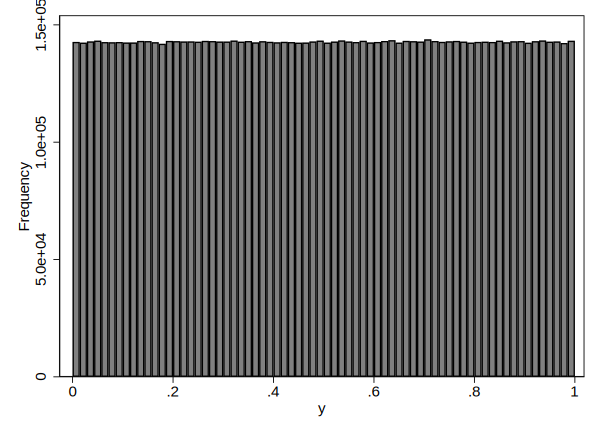

In [3]:
set obs 10000000
replace y = runiform() if missing(y)
hist y, freq

We can also combine random variables:

In [4]:
gen x1 = rgamma(9,0.5)
gen x2 = rgamma(7.5,1)
gen x3 = x1 + x2


(bin=70, start=.37228525, width=.23520847)


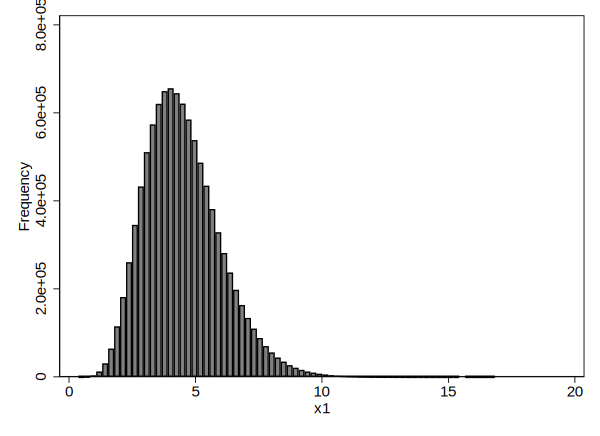




(bin=70, start=.46502763, width=.47477912)


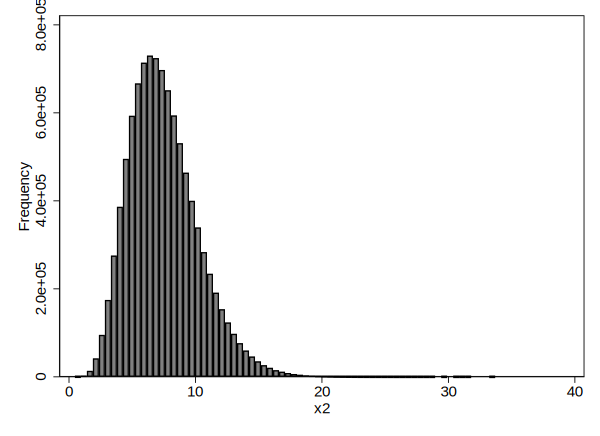




(bin=70, start=2.1730702, width=.53087058)


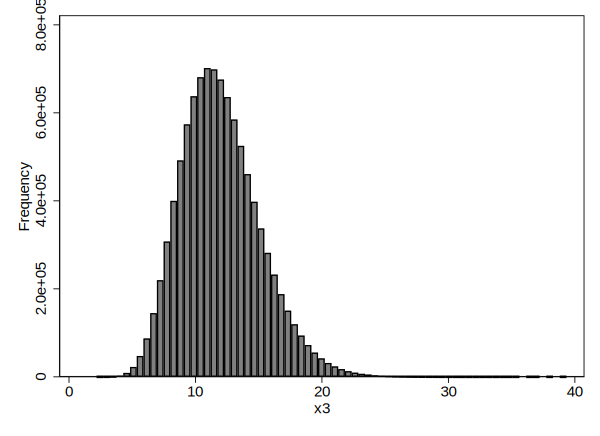

In [5]:
hist x1, freq
hist x2, freq
hist x3, freq

### Interactions, categorical variables and continuous variables.

We continue with the merged Swedish price data from last week.

In [6]:
clear
qui cd Z:/ECON-C4100 // change working dir
qui use data/sweden_prices_merged.dta, clear

We generated the numerical but string labeled variable for the ATC level 1:

In [7]:
tab atc1_group


group(atc_1 |
          ) |      Freq.     Percent        Cum.
------------+-----------------------------------
          A |      1,408       10.09       10.09
          B |        956        6.85       16.94
          C |      1,429       10.24       27.18
          D |        412        2.95       30.14
          G |        544        3.90       34.04
          H |        400        2.87       36.90
          J |      1,032        7.40       44.30
          L |      1,754       12.57       56.87
          M |        403        2.89       59.76
          N |      4,408       31.59       91.35
          P |         45        0.32       91.67
          R |        691        4.95       96.62
          S |        349        2.50       99.13
          V |        122        0.87      100.00
------------+-----------------------------------
      Total |     13,953      100.00


This variable is categorical variable (often called a factor variable). It can get only specific **discrete** values by the *DATA GENERATING PROCESS*. The numerical values themselves do not matter. Another example is the `pm_status` dummy variable (all dummy variables are categorical variables by definition).

However, most variables are continous. They can get  any values in some interval. For instance, our prices can take any values between zero and infinity. Another example of a continuous variable is the length of the product name, although you could say it's a discrete variable too. But we're talking about Stata/software variables, not maths.

In [8]:
%browse 10 name_length AIP atc1_group pm_status

,name_length,AIP,atc1_group,pm_status
1,5,510.48,A,1
2,21,226.8,R,1
3,5,697.76,A,1
4,15,37.91,R,1
5,15,336.51,R,1
6,11,345.5,R,1
7,11,98.8,R,1
8,9,23.46,N,1
9,8,21.58,H,1
10,10,40.11,N,1


You can use the categorical variables as dummies in your regression easily with the prefix `i.`. You can even specify the base level yourself with the `ib.` prefix:

In [9]:
reg AIP name_length pm_status ib3.atc1_group, r
tab atc1_group if atc1_group == 3



Linear regression                               Number of obs     =     13,953
                                                F(15, 13937)      =      67.36
                                                Prob > F          =     0.0000
                                                R-squared         =     0.1229
                                                Root MSE          =      10160

------------------------------------------------------------------------------
             |               Robust
         AIP |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 name_length |  -176.9473   10.54853   -16.77   0.000    -197.6239   -156.2708
   pm_status |  -1862.504    171.648   -10.85   0.000    -2198.957   -1526.051
             |
  atc1_group |
          A  |  -887.6416   230.0974    -3.86   0.000    -1338.663   -436.6198
          B  |   2483.324   547.7559     4.53   0.000     1409

Consider we want to take an interaction with the variable `pm_status` and `name_length`. We have four options:

1. Use only the interaction and not the "main effect": boolean operator `#`
2. Both interaction and the main effect: main effects typed indpendently, interaction with the boolean operator `#`
3. Both interaction and the main effect: boolean operator `##`
4. Generate the interactions manually.

In [10]:
gen interaction = name_length * pm_status

$AIP = \beta_0 + \beta_1 X_1 X_2 + \gamma ATC_i + u$

$AIP = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2 + \gamma ATC_i + u$

In [11]:
reg AIP c.name_length#i.pm_status i.atc1_group, r
reg AIP name_length pm_status c.name_length#i.pm_status i.atc1_group, r
reg AIP c.name_length##i.pm_status i.atc1_group, r
reg AIP name_length pm_status interaction i.atc1_group, r



Linear regression                               Number of obs     =     13,953
                                                F(15, 13937)      =      67.26
                                                Prob > F          =     0.0000
                                                R-squared         =     0.1185
                                                Root MSE          =      10185

-----------------------------------------------------------------------------------------
                        |               Robust
                    AIP |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
------------------------+----------------------------------------------------------------
pm_status#c.name_length |
                     0  |  -166.7039   11.64617   -14.31   0.000     -189.532   -143.8759
                     1  |   -226.299   13.41072   -16.87   0.000    -252.5858   -200.0121
                        |
             atc1_group |
                     B  |  

Notice the prefix `c.` in front of the numerical variable!

### Predicting values using Stata

`predict` is a postestimation command in Stata. Postestimation commands are commands that can be run after some estimation commmands such as `regress`. Postestimation commands use the estimates saved in Stata memory from the **previous** estimation command.

The first argument of `predict` is the name of the new *predicted* variable. Its options allows you to calculate the model predictions but also the model residuals:

In [12]:
predict y_hat, xb
predict y_resid, resid

The `predict` command is especially useful with time series data, but also in some simulations and manual 2SLS. We will cover it more in the second course.

It is also (sometimes) used to plot the residual distribution:

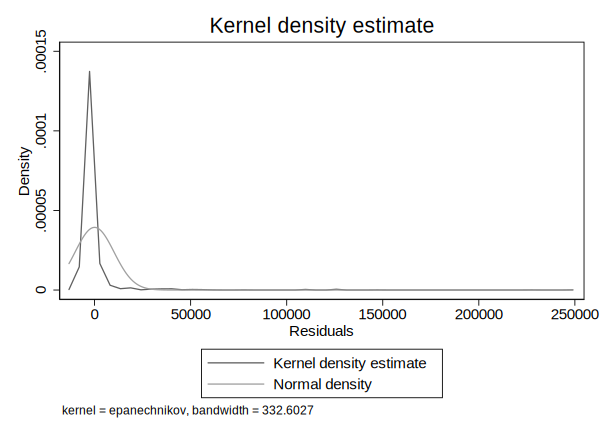

In [13]:
kdensity y_resid, normal

### Save data for later use

In [14]:
qui drop interaction y_hat y_resid
qui save data/sweden_prices_merged.dta, replace



file data/sweden_prices_merged.dta saved
